In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
SAMPLES = 1000
SEED = 214823

In [3]:
np.random.seed(SEED)
tf.random.set_seed(SEED)

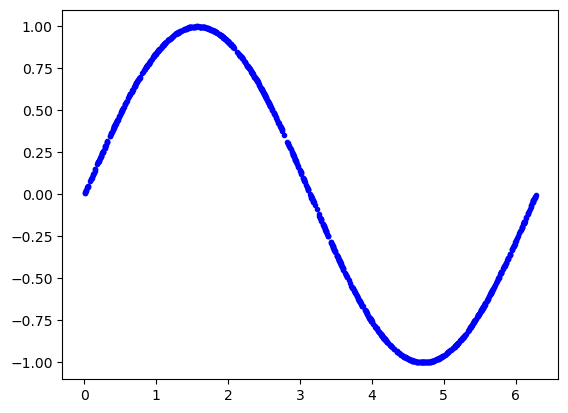

In [4]:
x_vals = np.random.uniform(low=0, high=2 * math.pi, size=SAMPLES)
np.random.shuffle(x_vals)
y_vals = np.sin(x_vals)
plt.plot(x_vals, y_vals, 'b.')
plt.show()

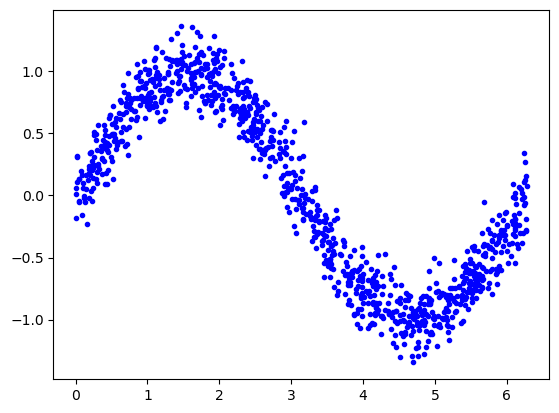

In [5]:
y_vals += 0.15 * np.random.randn(*y_vals.shape)
plt.plot(x_vals, y_vals, 'b.')
plt.show()

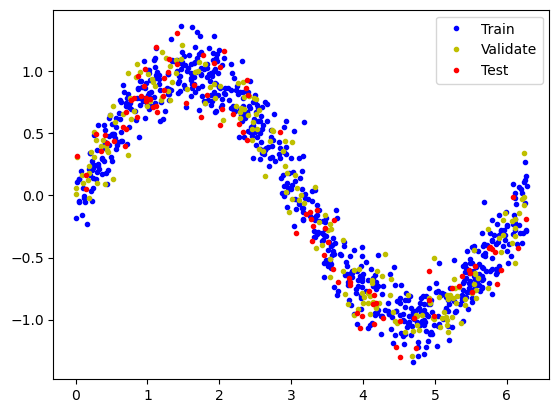

In [6]:
TRAIN_SPLIT = int(.7 * SAMPLES)
TEST_SPLIT = int(.2 * SAMPLES + TRAIN_SPLIT)

x_train, x_validate, x_test = np.split(x_vals, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_vals, [TRAIN_SPLIT, TEST_SPLIT])

assert(x_train.size + x_validate.size + x_test.size) == SAMPLES

plt.plot(x_train, y_train, 'b.', label='Train')
plt.plot(x_validate, y_validate, 'y.', label='Validate')
plt.plot(x_test, y_test, 'r.', label='Test')
plt.legend()
plt.show()

In [7]:
model = tf.keras.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape = (1,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,233
Trainable params: 3,233
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(
    x_train,
    y_train,
    epochs=1000,
    batch_size=16,
    validation_data=(x_validate, y_validate)
)

Epoch 1/1000


2024-11-11 14:32:32.722971: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


44/44 [==============================] - 0s 2ms/step - loss: 0.4256 - mae: 0.5580 - val_loss: 0.2921 - val_mae: 0.4722
Epoch 2/1000
44/44 [==============================] - 0s 815us/step - loss: 0.2749 - mae: 0.4482 - val_loss: 0.2105 - val_mae: 0.3815
Epoch 3/1000
44/44 [==============================] - 0s 1ms/step - loss: 0.1871 - mae: 0.3675 - val_loss: 0.1530 - val_mae: 0.3350
Epoch 4/1000
44/44 [==============================] - 0s 944us/step - loss: 0.1530 - mae: 0.3264 - val_loss: 0.1478 - val_mae: 0.3167
Epoch 5/1000
44/44 [==============================] - 0s 864us/step - loss: 0.1318 - mae: 0.2920 - val_loss: 0.1224 - val_mae: 0.2836
Epoch 6/1000
44/44 [==============================] - 0s 845us/step - loss: 0.1219 - mae: 0.2806 - val_loss: 0.1156 - val_mae: 0.2554
Epoch 7/1000
44/44 [==============================] - 0s 846us/step - loss: 0.1148 - mae: 0.2653 - val_loss: 0.1296 - val_mae: 0.2879
Epoch 8/1000
44/44 [==============================] - 0s 841us/step - loss: 0.1

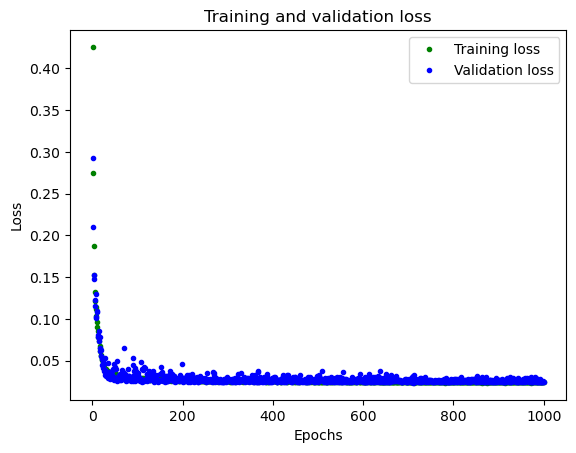

In [9]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

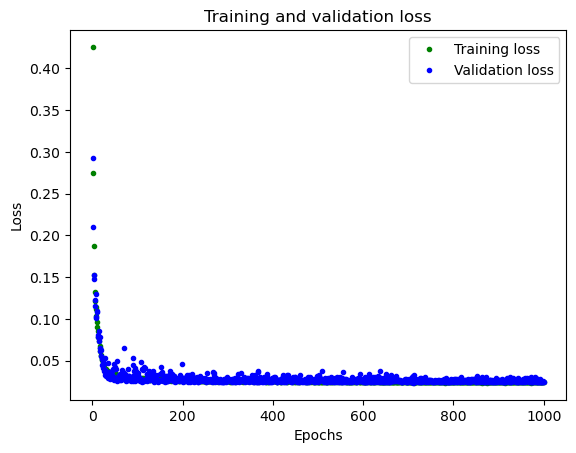

In [10]:
SKIP = 0
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

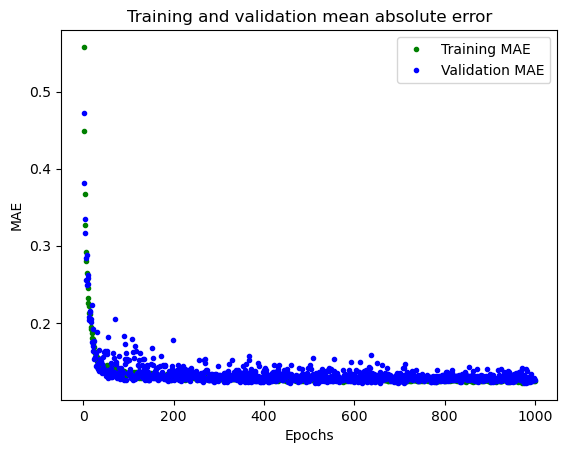

In [11]:
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

4/4 [==============================] - 0s 1ms/step


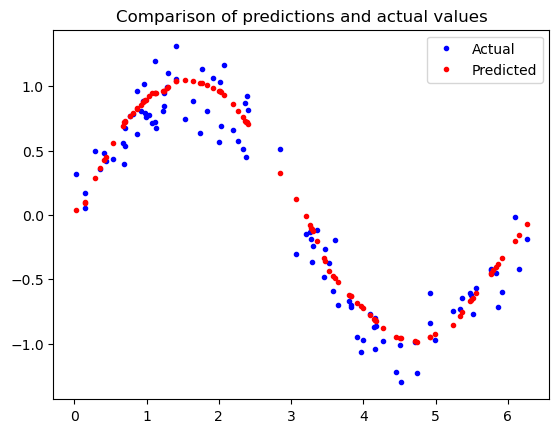

In [12]:
pred = model.predict(x_test)
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, pred, 'r.', label='Predicted')
plt.legend()
plt.show()

In [13]:
model.save('./assets/learned_sin_model.h5')

In [14]:
df_test = pd.DataFrame(x_test)
df_gt = pd.DataFrame(y_test)
df_test.to_csv('./assets/df_test.csv', index=False)
df_gt.to_csv('./assets/df_gt.csv', index=False)

4/4 [==============================] - 0s 653us/step


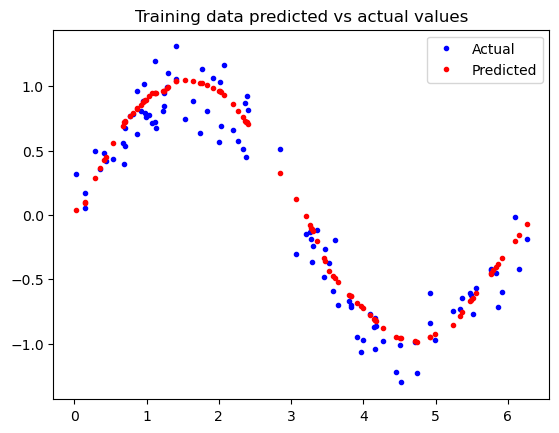

In [15]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

test_data = pd.read_csv('./assets/df_test.csv')
answer_data = pd.read_csv('./assets/df_gt.csv')
test_data = test_data.to_numpy()
answer_data = answer_data.to_numpy()

from tensorflow import keras
model = keras.models.load_model('./assets/learned_sin_model.h5')

predictions = model.predict(test_data)
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(test_data, answer_data, 'b.', label='Actual')
plt.plot(test_data, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

INFO:tensorflow:Assets written to: /var/folders/6h/yz_7x6lx13x2cdhh1474_z3w0000gn/T/tmpqfvlyqf5/assets


/opt/anaconda3/envs/embedded/lib/python3.10/site-packages/tensorflow/lite/python/convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "
2024-11-11 14:33:10.293502: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2024-11-11 14:33:10.293513: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2024-11-11 14:33:10.293932: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/6h/yz_7x6lx13x2cdhh1474_z3w0000gn/T/tmpqfvlyqf5
2024-11-11 14:33:10.294770: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2024-11-11 14:33:10.294776: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/6h/yz_7x6lx13x2cdhh1474_z3w0000gn/T/tmpqfvlyqf5
2024-11-11 14:33:10.296917:

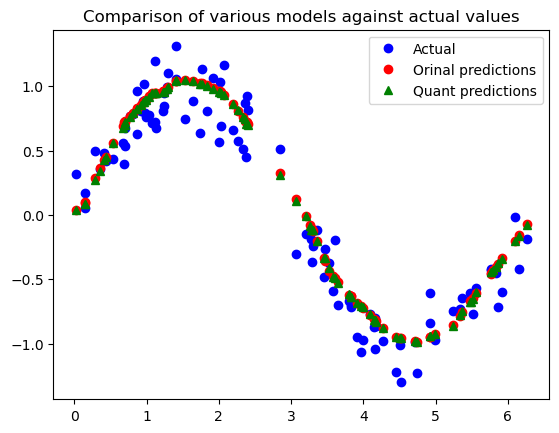

변환 전 :  62488
변환 후 :  6688


In [16]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

def representative_dataset_generator():
    for value in x_test:
        yield [np.array(value, dtype = np.float32, ndmin = 2)]

converter.representative_dataset = representative_dataset_generator
converter.experimental_new_converter = True
tflite_model = converter.convert()
open('./assets/learned_sin_model_quantized.tflite', 'wb').write(tflite_model)

interpreter = tf.lite.Interpreter(model_path='./assets/learned_sin_model_quantized.tflite')
interpreter.allocate_tensors()
input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']
predict = []

for x_value in x_test:
    x_value_tensor = tf.convert_to_tensor([[x_value]], dtype = np.float32)
    interpreter.set_tensor(input_index, x_value_tensor)
    interpreter.invoke()
    predict.append(interpreter.get_tensor(output_index)[0])

plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label = 'Actual')
plt.plot(x_test, predictions, 'ro', label = 'Orinal predictions')
plt.plot(x_test, predict, 'g^', label = 'Quant predictions')
plt.legend()
plt.show()

import os
basic_model = os.path.getsize('./assets/learned_sin_model.h5')
print('변환 전 : ', basic_model)
trans_model = os.path.getsize('./assets/learned_sin_model_quantized.tflite')
print('변환 후 : ', trans_model)